# Objective
> The primary objective of this case study is to develop, test, and optimize 2–3 day trading strategies focused on small to large-cap equities with a holding period of 1min – 7 hours. The aim is to capitalize on short-term market movements using quantitative and technical techniques. -  Stratagem Research

## Day Trading Strategies
#### ICT Methods (Inner Circle Trader):
> How it works: ICT methods focus on market manipulation by large institutions. They use concepts like market structure, order blocks, liquidity pools, and imbalance areas. Traders look for price action signals in these areas to enter and exit trades.

> Downsides: Requires deep understanding and experience. Not suitable for beginners due to complexity. Markets may not always behave as predicted by ICT concepts.

#### Gap Hunts:
> How it works: Traders exploit price gaps that occur when the market opens significantly higher or lower than the previous close. They anticipate that the gap will fill (the price will move back to the previous close level).

> Downsides: Not all gaps fill, and trying to trade every gap can lead to significant losses. Market conditions need to be right for gap trading to be effective.

#### Momentum/Trend Following:
> How it works: Traders follow the prevailing trend, buying in an uptrend and selling in a downtrend. They use indicators like Moving Averages, Relative Strength Index (RSI), and MACD to identify trends and confirm momentum.

> Downsides: Trends can reverse suddenly, leading to losses. Trend-following can also lead to late entries and exits, reducing profit margins. It can be challenging in sideways or choppy markets.

#### Pullbacks:
> How it works: Traders look for temporary price retracements within a larger trend. They enter trades in the direction of the trend after the price pulls back to a support or resistance level.

> Downsides: Determining the end of a pullback can be difficult. Pullbacks can turn into full trend reversals, leading to losses. Requires accurate timing and market analysis.

#### Mean Reversions:
> How it works: Traders assume that prices will revert to their historical average or mean. They buy when prices are below the mean and sell when prices are above the mean, using indicators like Bollinger Bands and moving averages (Can use different rolling and estimated moving averages over different time frames).

> Downsides: Prices may stay overbought or oversold for extended periods, leading to significant drawdowns. Mean reversion strategies can fail in trending markets where prices move far from the mean.

#### Breakouts:
> How it works: Traders enter positions when the price breaks through a significant support or resistance level with increased volume. They use indicators like Bollinger Bands, trendlines, and pivot points to identify breakouts.

> Downsides: False breakouts (fakeouts) are common, leading to losses. Requires quick decision-making and fast execution. High volatility can result in large price swings against the trader.

## Detailed Market Scenarios and the use of these 6 different trading strategies:
> #### High Volatility Market
>> The market experiences a sudden spike in volatility due to unexpected geopolitical tensions. Stock prices exhibit wide intraday swings, and the VIX (Volatility Index) spikes to its highest level in months.
>>> ICT Methods: How do order blocks and liquidity pools behave under extreme volatility?

>>> Gap Hunts: Evaluate the frequency and reliability of gap fills during high volatility.

>>> Momentum/Trend Following: Assess the ability to ride short-term trends amidst rapid price movements.

>>> Pullbacks: Test the identification and success rate of pullbacks during large price swings.

>>> Mean Reversions: Check the viability of mean reversion trades in a highly volatile environment.

>>> Breakouts: Monitor the success rate of breakouts and false breakouts.

> #### Market Announcement Day
>> The Federal Reserve is scheduled to announce its interest rate decision. Leading up to the announcement, the market is relatively calm, but significant price movements are expected once the announcement is made. A company is about to annouce its earnings or has a significant event lined up: eg: WWDC for AAPL
>>> ICT Methods: Monitor price action around key levels before and after the announcement.

>>> Gap Hunts: Identify potential gaps created by the announcement and their fill probabilities.

>>> Momentum/Trend Following: Track the emergence of new trends post-announcement.

>>> Pullbacks: Evaluate pullback opportunities created by the initial price reaction.

>>> Mean Reversions: Assess the potential for price reversion following the initial announcement shock.

>>> Breakouts: Identify breakout opportunities around the announcement time.

> #### Typical Trading Day
>> The market exhibits typical behavior with moderate volatility, influenced by regular economic data releases.
>>> ICT Methods: Observe how standard market structures and liquidity pools behave in normal conditions.

>>> Gap Hunts: Evaluate the occurrence and reliability of gaps on a regular trading day.

>>> Momentum/Trend Following: Test the ability to follow medium-term trends in a stable environment.

>>> Pullbacks: Identify and trade pullbacks in the context of ongoing trends.

>>> Mean Reversions: Monitor opportunities for mean reversion trades in a balanced market.

>>> Breakouts: Identify and trade breakouts from established support and resistance levels.

<div class="alert alert-block alert-info">
Code for Gap Hunts
</div>

In [55]:
import numpy as np
import pandas as pd
import yfinance as yf
from math import sqrt
import matplotlib.pyplot as plt
from datetime import timedelta
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
rcParams['font.family'] = 'serif'
import seaborn as sb
pd.set_option('min_rows',800)
sb.set()

In [33]:
## ticker = yf.download('SPY','2010-1-1') # The ticker can be changed based on what stock you want to implement the strategy on
ticker_day = yf.download(['SPY'],period='6mo',interval='1d')
vix = yf.download(['^VIX'],period='6mo',interval='1d') # Important to note that this is expected annualized volatility for the next 30 days, to convert it into daily volatility I will divide it by sqrt 252 
ticker_day['VIX'] = vix['Close']/sqrt(252)
ticker_day


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-03  470.429993  471.190002  468.170013  468.790009  465.835144   
2024-01-04  468.299988  470.959991  467.049988  467.279999  464.334625   
2024-01-05  467.489990  470.440002  466.429993  467.920013  464.970642   
2024-01-08  468.429993  474.750000  468.299988  474.600006  471.608521   
2024-01-09  471.869995  474.929993  471.350006  473.880005  470.893066   
...                ...         ...         ...         ...         ...   
2024-06-26  543.690002  546.239990  543.030029  545.510010  545.510010   
2024-06-27  545.369995  546.960022  544.609985  546.369995  546.369995   
2024-06-28  547.159973  550.280029  542.950012  544.219971  544.219971   
2024-07-01  545.630005  545.880005  542.520020  545.340027  545.340027   
2024-07-02  543.700012  549.010010  543.650024  549.010010  549.010010   

               Volume       VIX  
Date                             
2024-01-03  103585900  0.884437  
2024-01-04   84232200  0.890106  
2024-01-05   86060800  0.840971  
2024-01-08   74879100  0.823963  
2024-01-09   65931400  0.803804  
...               ...       ...  
2024-06-26   38550600  0.790576  
2024-06-27   35041500  0.771048  
2024-06-28   76144500  0.783646  
2024-07-01   40297800  0.769788  
2024-07-02   40366700  0.757819  

[125 rows x 7 columns]

In [34]:
ticker_day['Gap'] = ticker_day['Open']-ticker_day['Close'].shift(1)
ticker_day

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-03  470.429993  471.190002  468.170013  468.790009  465.835144   
2024-01-04  468.299988  470.959991  467.049988  467.279999  464.334625   
2024-01-05  467.489990  470.440002  466.429993  467.920013  464.970642   
2024-01-08  468.429993  474.750000  468.299988  474.600006  471.608521   
2024-01-09  471.869995  474.929993  471.350006  473.880005  470.893066   
...                ...         ...         ...         ...         ...   
2024-06-26  543.690002  546.239990  543.030029  545.510010  545.510010   
2024-06-27  545.369995  546.960022  544.609985  546.369995  546.369995   
2024-06-28  547.159973  550.280029  542.950012  544.219971  544.219971   
2024-07-01  545.630005  545.880005  542.520020  545.340027  545.340027   
2024-07-02  543.700012  549.010010  543.650024  549.010010  549.010010   

               Volume       VIX       Gap  
Date                                       
2024-01-03  103585900  0.884437       NaN  
2024-01-04   84232200  0.890106 -0.490021  
2024-01-05   86060800  0.840971  0.209991  
2024-01-08   74879100  0.823963  0.509979  
2024-01-09   65931400  0.803804 -2.730011  
...               ...       ...       ...  
2024-06-26   38550600  0.790576 -1.140015  
2024-06-27   35041500  0.771048 -0.140015  
2024-06-28   76144500  0.783646  0.789978  
2024-07-01   40297800  0.769788  1.410034  
2024-07-02   40366700  0.757819 -1.640015  

[125 rows x 8 columns]

It is important to realise that everyday, markets open either up or down but to have a significant impact, the percentages should be large enough, therefore I would be describing the statistics of the Gap column to find further statistics. 

In [35]:
ticker_day['Gap'].describe()

count    124.000000
mean       0.408470
std        2.204519
min       -6.450012
25%       -0.727486
50%        0.499985
75%        1.727501
max        6.800018
Name: Gap, dtype: float64

The average change is +0.133163$ however, taking the standard deviation we see that approx 68% of our data lies within 0.133163 
+- 1.710912.

Approximately 95% of our data then lies within 0.133163 +- 3.421924

In [36]:
one_std = np.arange(ticker_day['Gap'].mean().round(4)-ticker_day['Gap'].std().round(4),ticker_day['Gap'].mean().round(4)+ticker_day['Gap'].std().round(4),0.0001)
two_std = np.arange(ticker_day['Gap'].mean().round(4)-2*ticker_day['Gap'].std().round(4),ticker_day['Gap'].mean().round(4)+2*ticker_day['Gap'].std().round(4),0.0001)

First, I will try to test the strategy with one_std and if that yields lower accuracy, we will try the two_std, just because the frequency of the former would be higher therefore more number of trades

In [37]:
ticker_day['Gap_Up'] = np.where(ticker_day['Gap']>one_std[-1],1,0)
ticker_day['Gap_Down'] = np.where(ticker_day['Gap']<one_std[0],1,0)
ticker_day['Gap_Up2'] = np.where(ticker_day['Gap']>two_std[-1],1,0)
ticker_day['Gap_Down2'] = np.where(ticker_day['Gap']<two_std[0],1,0)
ticker_day['Position'] = 0
ticker_day['PnL'] = 0
ticker_day
#ticker_day[ticker_day['Gap_Up']==1].index

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-03  470.429993  471.190002  468.170013  468.790009  465.835144   
2024-01-04  468.299988  470.959991  467.049988  467.279999  464.334625   
2024-01-05  467.489990  470.440002  466.429993  467.920013  464.970642   
2024-01-08  468.429993  474.750000  468.299988  474.600006  471.608521   
2024-01-09  471.869995  474.929993  471.350006  473.880005  470.893066   
...                ...         ...         ...         ...         ...   
2024-06-26  543.690002  546.239990  543.030029  545.510010  545.510010   
2024-06-27  545.369995  546.960022  544.609985  546.369995  546.369995   
2024-06-28  547.159973  550.280029  542.950012  544.219971  544.219971   
2024-07-01  545.630005  545.880005  542.520020  545.340027  545.340027   
2024-07-02  543.700012  549.010010  543.650024  549.010010  549.010010   

               Volume       VIX       Gap  Gap_Up  Gap_Down  Gap_Up2  \
Date                                                                   
2024-01-03  103585900  0.884437       NaN       0         0        0   
2024-01-04   84232200  0.890106 -0.490021       0         0        0   
2024-01-05   86060800  0.840971  0.209991       0         0        0   
2024-01-08   74879100  0.823963  0.509979       0         0        0   
2024-01-09   65931400  0.803804 -2.730011       0         1        0   
...               ...       ...       ...     ...       ...      ...   
2024-06-26   38550600  0.790576 -1.140015       0         0        0   
2024-06-27   35041500  0.771048 -0.140015       0         0        0   
2024-06-28   76144500  0.783646  0.789978       0         0        0   
2024-07-01   40297800  0.769788  1.410034       0         0        0   
2024-07-02   40366700  0.757819 -1.640015       0         0        0   

            Gap_Down2  Position  PnL  
Date                                  
2024-01-03          0         0    0  
2024-01-04          0         0    0  
2024-01-05          0         0    0  
2024-01-08          0         0    0  
2024-01-09          0         0    0  
...               ...       ...  ...  
2024-06-26          0         0    0  
2024-06-27          0         0    0  
2024-06-28          0         0    0  
2024-07-01          0         0    0  
2024-07-02          0         0    0  

[125 rows x 14 columns]

In [46]:
for i in range(0,len(ticker_day)):
    if ticker_day['Gap_Up'].iloc[i] ==1:
        if ticker_day['Gap_Up2'].iloc[i] ==1:
            entry_price = ticker_day['Open'].iloc[i]
            ticker_day['Position'].iloc[i] = -2
        else:
            entry_price = ticker_day['Open'].iloc[i]
            ticker_day['Position'].iloc[i] = -1
        Date = ticker_day[ticker_day['Open']==entry_price].index
        for j in Date:
            ticker = pd.DataFrame()
            ticker = yf.download('SPY',j,j+timedelta(days=0,hours=23),interval='5m')
            print(ticker)
            for k in range(0,len(ticker)):
                if ticker['Close'].iloc[k]>(100+ticker_day['VIX'].iloc[i]/2)*entry_price: # Trigger Stoploss if it moves above half of its expected volatility
                    exit_price = ticker['Close'].iloc[k]
                if ticker['Close'].iloc[k]<(100-ticker_day['VIX'].iloc[i]/2)*entry_price: # Target if it moves below half of its expected movement
                    exit_price = ticker['Close'].iloc[k]
                else:
                    exit_price = ticker_day['Close'].iloc[i]
        if ticker_day['Position'].iloc[i]==-2:
            ticker_day['PnL'].iloc[i] = 2*(entry_price - exit_price)
        else:
            ticker_day['PnL'].iloc[i] = entry_price - exit_price
    elif ticker_day['Gap_Down'].iloc[i] ==1:
        if ticker_day['Gap_Down2'].iloc[i] ==1:
            entry_price = ticker_day['Open'].iloc[i]
            ticker_day['Position'].iloc[i] = 2
        else:
            entry_price = ticker_day['Open'].iloc[i]
            ticker_day['Position'].iloc[i] = -1
        Date = ticker_day[ticker_day['Open']==entry_price].index
        for j in Date:
            print(j)
            ticker = pd.DataFrame()
            ticker = yf.download('SPY',j,j+timedelta(days=0,hours=23),interval='5m')
            for k in range(0,len(ticker)):
                if ticker['Close'].iloc[k]>(100+ticker_day['VIX'].iloc[i]/2)*entry_price: # Target if it moves below half of its expected movement
                    exit_price = ticker['Close'].iloc[k]
                if ticker['Close'].iloc[k]<(100-ticker_day['VIX'].iloc[i]/2)*entry_price: # Trigger Stoploss if it moves above half of its expected volatility
                    exit_price = ticker['Close'].iloc[k]
                else:
                    exit_price = ticker_day['Close'].iloc[i]
        if ticker_day['Position'].iloc[i]==-2:
            ticker_day['PnL'].iloc[i] = 2*(exit_price - entry_price)
        else:
            ticker_day['PnL'].iloc[i] = exit_price-entry_price
count = 0
for i in range(0,len(ticker_day)):
    if ticker_day['Position'].iloc[i] == 0:
        continue
    else:
        count +=1
ticker_day['Cumulative_PnL'] = ticker_day['PnL'].cumsum()
ticker_day


/tmp/ipykernel_1796/1518822262.py:31: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ticker_day['Position'].iloc[i] = -1
/tmp/ipykernel_1796/1518822262.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

/tmp/ipykernel_1796/1518822262.py:47: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ticker_day['PnL'].iloc[i] = exit_price-entry_price
/tmp/ipykernel_1796/1518822262.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

2024-01-09 00:00:00
2024-01-17 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-01-31 00:00:00
2024-02-13 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-03-05 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-03-15 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SPY']: YFChartError('%ticker%: 5m data not available for startTime=1711512000 and endTime=1711594800. The requested range must be within the last 60 days.')
/tmp/ipykernel_1796/1518822262.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://panda

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-04-02 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-04-10 00:00:00
2024-04-12 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-04-25 00:00:00
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
2024-05-08 00:00:00
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-05-23 09:30:00-04:00  532.960022  533.070007  531.809998  531.859985   
2024-05-23 09:35:00-04:00  531.840027  532.070007  531.620911  531.840027   
2024-05-23 09:40:00-04:00  531.830017  


/tmp/ipykernel_1796/1518822262.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ticker_day['PnL'].iloc[i] = entry_price - exit_price
/tmp/ipykernel_1796/1518822262.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-06-12 09:30:00-04:00  541.359985  541.710022  541.244995  541.330017   
2024-06-12 09:35:00-04:00  541.359985  541.830017  541.270020  541.770020   
2024-06-12 09:40:00-04:00  541.775024  542.679993  541.669983  542.670105   
2024-06-12 09:45:00-04:00  542.659973  542.880005  542.494995  542.849976   
2024-06-12 09:50:00-04:00  542.859985  542.900024  542.349976  542.359985   
2024-06-12 09:55:00-04:00  542.359985  542.960022  542.353210  542.688721   
2024-06-12 10:00:00-04:00  542.679993  542.969971  542.539978  542.900024   
2024-06-12 10:05:00-04:00  542.909973  542.989990  542.585022  542.690002   
2024-06-12 10:10:00-04:00  542.690002  543.175110  542.580017  543.130005   
2024-06-12 10:15:00-04:00  543.130005  543.479980  543.130005  543.359985   
2024-06-12 10:20:00-04:00  543.359985  543.560608  543.242920  543.510010   

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-03  470.429993  471.190002  468.170013  468.790009  465.835144   
2024-01-04  468.299988  470.959991  467.049988  467.279999  464.334625   
2024-01-05  467.489990  470.440002  466.429993  467.920013  464.970642   
2024-01-08  468.429993  474.750000  468.299988  474.600006  471.608521   
2024-01-09  471.869995  474.929993  471.350006  473.880005  470.893066   
2024-01-10  474.160004  477.450012  473.869995  476.559998  473.556152   
2024-01-11  477.589996  478.119995  472.260010  476.350006  473.347504   
2024-01-12  477.839996  478.600006  475.230011  476.679993  473.675385   
2024-01-16  475.260010  476.609985  473.059998  474.929993  471.936401   
2024-01-17  471.820007  472.790009  469.869995  472.290009  469.313080   
2024-01-18  474.010010  477.059998  472.420013  476.489990  473.486603   
2024-01-19  477.649994  482.720001  476.540009  482.429993  479.389160   
2024-01-22  484.010010  485.220001  482.779999  483.450012  480.402740   
2024-01-23  484.010010  485.109985  482.890015  484.859985  481.803833   
2024-01-24  487.809998  488.769989  484.880005  485.390015  482.330505   
2024-01-25  487.579987  488.309998  485.390015  488.029999  484.953857   
2024-01-26  487.589996  489.119995  486.540009  487.410004  484.337769   
2024-01-29  487.730011  491.420013  487.170013  491.269989  488.173401   
2024-01-30  490.559998  491.619995  490.109985  490.890015  487.795837   
2024-01-31  488.619995  489.079987  482.859985  482.880005  479.836304   
2024-02-01  484.630005  489.230011  483.799988  489.200012  486.116516   
2024-02-02  489.649994  496.049988  489.299988  494.350006  491.234039   
2024-02-05  493.700012  494.380005  490.230011  492.549988  489.445374   
2024-02-06  493.519989  494.320007  492.049988  493.980011  490.866364   
2024-02-07  496.290009  498.529999  495.359985  498.100006  494.960388   
2024-02-08  498.100006  498.709991  497.260010  498.320007  495.179016   
2024-02-09  498.839996  501.649994  498.489990  501.200012  498.040863   
2024-02-12  501.170013  503.500000  500.239990  500.980011  497.822235   
2024-02-13  494.529999  497.089996  490.720001  494.079987  490.965698   
2024-02-14  496.790009  499.070007  494.399994  498.570007  495.427429   
...                ...         ...         ...         ...         ...   
2024-05-20  529.570007  531.559998  529.169983  530.059998  528.355469   
2024-05-21  529.280029  531.520020  529.070007  531.359985  529.651245   
2024-05-22  530.650024  531.380005  527.599976  529.830017  528.126221   
2024-05-23  532.960022  533.070007  524.719971  525.960022  524.268677   
2024-05-24  527.849976  530.270020  526.880005  529.440002  527.737488   
2024-05-28  530.270020  530.510010  527.109985  529.809998  528.106262   
2024-05-29  525.679993  527.309998  525.369995  526.099976  524.408203   
2024-05-30  524.520020  525.200012  521.330017  522.609985  520.929382   
2024-05-31  523.590027  527.500000  518.359985  527.369995  525.674133   
2024-06-03  529.020020  529.309998  522.599976  527.799988  526.102722   
2024-06-04  526.460022  529.150024  524.960022  528.390015  526.690857   
2024-06-05  530.770020  534.690002  528.729980  534.669983  532.950623   
2024-06-06  534.979980  535.419983  532.679993  534.659973  532.940674   
2024-06-07  533.659973  536.890015  532.539978  534.010010  532.292786   
2024-06-10  533.179993  535.989990  532.570007  535.659973  533.937439   
2024-06-11  534.070007  537.010010  532.049988  536.950012  535.223328   
2024-06-12  541.630005  544.119995  540.299988  541.359985  539.619141   
2024-06-13  543.150024  543.330017  539.590027  542.450012  540.705627   
2024-06-14  540.880005  542.809998  539.849976  542.780029  541.034607   
2024-06-17  542.080017  548.530029  541.609985  547.099976  545.340637   
2024-06-18  547.159973  548.619995  546.729980  548.489990  546.726196   
2024-06-20  549.440002

<div class="alert alert-block alert-info">
Code for Moving Averages
</div>

In [37]:
# We need a fresh Dataframe for SPY
SPY = yf.download(['SPY'],'2020-1-1')
del SPY['Volume']
del SPY['High']
del SPY['Low']
del SPY['Adj Close']

[*********************100%%**********************]  1 of 1 completed


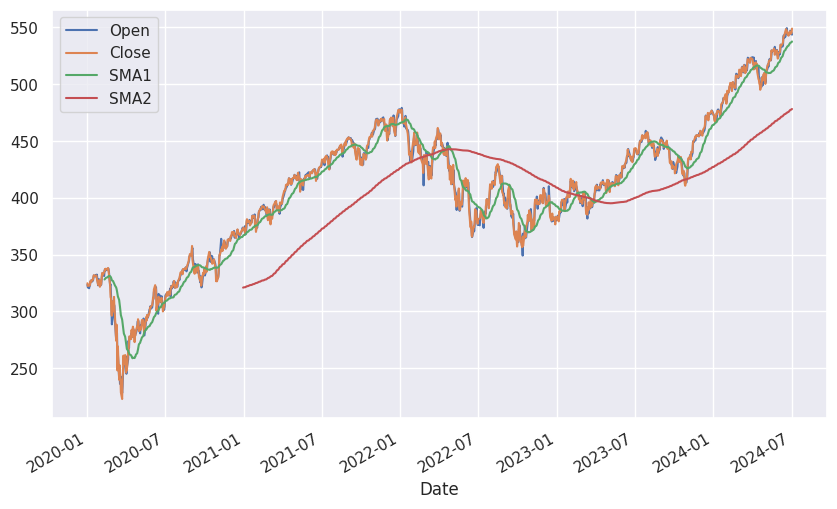

In [38]:
SMA1 = 28
SMA2 = 252
SPY['SMA1'] = SPY['Close'].rolling(SMA1).mean()
SPY['SMA2'] = SPY['Close'].rolling(SMA2).mean()
SPY.plot(figsize=(10,6));

To trade: 
> Go long when the 28 SMA is bove the 252 SMA

> Go short when vice versa

However this is not an intraday strategy rather, this is for long term holding and long term shorting
>> Therefore to implement the Pullback strategy I need to find a way to quantify the long term moving average

In [39]:
SPY.dropna()

Open       Close        SMA1        SMA2
Date                                                      
2020-12-30  372.339996  371.989990  366.564285  321.007501
2020-12-31  371.779999  373.880005  367.139285  321.201985
2021-01-04  375.309998  368.790009  367.620001  321.386033
2021-01-05  368.100006  371.329987  368.115358  321.575279
2021-01-06  369.709991  373.549988  368.484286  321.776945
2021-01-07  376.100006  379.100006  369.071429  321.993810
2021-01-08  380.589996  381.260010  369.699643  322.210517
2021-01-11  377.850006  378.690002  370.293571  322.420755
2021-01-12  378.890015  378.769989  370.748929  322.622421
2021-01-13  378.690002  379.790009  371.213214  322.830120
2021-01-14  380.589996  378.459991  371.633571  323.029604
2021-01-15  376.720001  375.700012  371.842500  323.207302
2021-01-19  378.339996  378.649994  372.183928  323.392620
2021-01-20  381.109985  383.890015  372.673928  323.601310
2021-01-21  384.489990  384.239990  373.294999  323.811231
2021-01-22  382.250000  382.880005  373.871785  324.014247
2021-01-25  383.670013  384.390015  374.517857  324.234961
2021-01-26  385.410004  383.790009  375.201072  324.474207
2021-01-27  380.220001  374.410004  375.373215  324.662779
2021-01-28  376.359985  377.630005  375.639643  324.865199
2021-01-29  375.630005  370.070007  375.562144  325.033414
2021-02-01  373.720001  376.230011  375.813930  325.249683
2021-02-02  379.649994  381.549988  376.302859  325.477580
2021-02-03  382.440002  381.850006  376.824645  325.687064
2021-02-04  382.959991  386.190002  377.489645  325.898691
2021-02-05  388.200012  387.709991  378.157859  326.111906
2021-02-08  389.269989  390.510010  378.812859  326.343295
2021-02-09  389.609985  390.250000  379.483930  326.563810
2021-02-10  392.119995  390.079987  380.130002  326.781350
2021-02-11  391.239990  390.709991  380.731073  326.992818
...                ...         ...         ...         ...
2024-05-20  529.570007  530.059998  512.050002  465.785675
2024-05-21  529.280029  531.359985  512.527144  466.233056
2024-05-22  530.650024  529.830017  513.205002  466.673691
2024-05-23  532.960022  525.960022  513.973216  467.117620
2024-05-24  527.849976  529.440002  514.898574  467.587263
2024-05-28  530.270020  529.809998  515.943574  468.044247
2024-05-29  525.679993  526.099976  516.892859  468.465199
2024-05-30  524.520020  522.609985  517.873216  468.871667
2024-05-31  523.590027  527.369995  518.860716  469.306271
2024-06-03  529.020020  527.799988  519.651787  469.726826
2024-06-04  526.460022  528.390015  520.472501  470.125516
2024-06-05  530.770020  534.669983  521.586073  470.552381
2024-06-06  534.979980  534.659973  522.528928  470.975516
2024-06-07  533.659973  534.010010  523.384286  471.401945
2024-06-10  533.179993  535.659973  524.587142  471.824683
2024-06-11  534.070007  536.950012  525.894285  472.249485
2024-06-12  541.630005  541.359985  527.191784  472.676310
2024-06-13  543.150024  542.450012  528.304642  473.096112
2024-06-14  540.880005  542.780029  529.240714  473.515159
2024-06-17  542.080017  547.099976  530.310713  473.929842
2024-06-18  547.159973  548.489990  531.428569  474.362501
2024-06-20  549.440002  547.000000  532.386784  474.798294
2024-06-21  544.400024  544.510010  533.232141  475.233096
2024-06-24  544.330017  542.739990  534.011784  475.654643
2024-06-25  543.989990  544.830017  534.780714  476.097580
2024-06-26  543.690002  545.510010  535.342499  476.550239
2024-06-27  545.369995  546.369995  535.973927  476.987540
2024-06-28  547.159973  544.219971  536.501426  477.415437
2024-07-01  545.630005  545.340027  537.047141  477.840953
2024-07-02  543.700012  549.010010  537.677499  478.260516

[881 rows x 4 columns]

In [51]:
SPY_SMA2_Pct_change = SPY['SMA2'].pct_change()*100
SPY["SMA2 % Change"] = SPY_SMA2_Pct_change
SPY_Close_Pct_change = SPY['Close'].pct_change()*100
SPY["Close % Change"] = SPY_Close_Pct_change
SPY['Position'] = 0
SPY['PnL'] = 0
SPY['Cumulative PnL'] = SPY['PnL'].cumsum()
SPY.dropna()

/tmp/ipykernel_44584/4173948855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY["SMA2 % Change"] = SPY_SMA2_Pct_change
/tmp/ipykernel_44584/4173948855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY["Close % Change"] = SPY_Close_Pct_change
/tmp/ipykernel_44584/4173948855.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Open       Close        SMA1        SMA2  SMA2 % Change  \
Date                                                                        
2021-01-04  375.309998  368.790009  367.620001  321.386033       0.057300   
2021-01-05  368.100006  371.329987  368.115358  321.575279       0.058884   
2021-01-06  369.709991  373.549988  368.484286  321.776945       0.062712   
2021-01-07  376.100006  379.100006  369.071429  321.993810       0.067396   
2021-01-08  380.589996  381.260010  369.699643  322.210517       0.067301   
2021-01-11  377.850006  378.690002  370.293571  322.420755       0.065249   
2021-01-12  378.890015  378.769989  370.748929  322.622421       0.062548   
2021-01-13  378.690002  379.790009  371.213214  322.830120       0.064378   
2021-01-14  380.589996  378.459991  371.633571  323.029604       0.061792   
2021-01-15  376.720001  375.700012  371.842500  323.207302       0.055010   
2021-01-19  378.339996  378.649994  372.183928  323.392620       0.057337   
2021-01-20  381.109985  383.890015  372.673928  323.601310       0.064532   
2021-01-21  384.489990  384.239990  373.294999  323.811231       0.064870   
2021-01-22  382.250000  382.880005  373.871785  324.014247       0.062696   
2021-01-25  383.670013  384.390015  374.517857  324.234961       0.068119   
2021-01-26  385.410004  383.790009  375.201072  324.474207       0.073788   
2021-01-27  380.220001  374.410004  375.373215  324.662779       0.058116   
2021-01-28  376.359985  377.630005  375.639643  324.865199       0.062348   
2021-01-29  375.630005  370.070007  375.562144  325.033414       0.051780   
2021-02-01  373.720001  376.230011  375.813930  325.249683       0.066538   
2021-02-02  379.649994  381.549988  376.302859  325.477580       0.070068   
2021-02-03  382.440002  381.850006  376.824645  325.687064       0.064362   
2021-02-04  382.959991  386.190002  377.489645  325.898691       0.064979   
2021-02-05  388.200012  387.709991  378.157859  326.111906       0.065423   
2021-02-08  389.269989  390.510010  378.812859  326.343295       0.070954   
2021-02-09  389.609985  390.250000  379.483930  326.563810       0.067572   
2021-02-10  392.119995  390.079987  380.130002  326.781350       0.066615   
2021-02-11  391.239990  390.709991  380.731073  326.992818       0.064712   
2021-02-12  389.850006  392.640015  381.582858  327.213374       0.067450   
2021-02-16  393.959991  392.299988  382.331787  327.430437       0.066337   
...                ...         ...         ...         ...            ...   
2024-05-20  529.570007  530.059998  512.050002  465.785675       0.094511   
2024-05-21  529.280029  531.359985  512.527144  466.233056       0.096049   
2024-05-22  530.650024  529.830017  513.205002  466.673691       0.094510   
2024-05-23  532.960022  525.960022  513.973216  467.117620       0.095126   
2024-05-24  527.849976  529.440002  514.898574  467.587263       0.100541   
2024-05-28  530.270020  529.809998  515.943574  468.044247       0.097732   
2024-05-29  525.679993  526.099976  516.892859  468.465199       0.089939   
2024-05-30  524.520020  522.609985  517.873216  468.871667       0.086766   
2024-05-31  523.590027  527.369995  518.860716  469.306271       0.092691   
2024-06-03  529.020020  527.799988  519.651787  469.726826       0.089612   
2024-06-04  526.460022  528.390015  520.472501  470.125516       0.084877   
2024-06-05  530.770020  534.669983  521.586073  470.552381       0.090798   
2024-06-06  534.979980  534.659973  522.528928  470.975516       0.089923   
2024-06-07  533.659973  534.010010  523.384286  471.401945       0.090542   
2024-06-10  533.179993  535.659973  524.587142  471.824683       0.089677   
2024-06-11  534.070007  536.950012  525.894285  472.249485       0.090034   
2024-06-12  541.630005  541.359985  527.191784  472.676310       0.090381   
2024-06-13  543.150024  542.450012  528.304642  473.096112       0.088814   
2024-06-14  540.880005  542.780029  529.240714  473.515159       0.088576   
2024-06-17  54

In [58]:
SPY = SPY.dropna()
for i in range(1,len(SPY)):
    if SPY['SMA2 % Change'].iloc[i-1] > 0 and SPY['Close % Change'].iloc[i-1]<-0.3:
        entry_price = SPY['Open'].iloc[i]
        exit_price = SPY['Close'].iloc[i]
        SPY['Position'].iloc[i] = 1
        SPY['PnL'].iloc[i] = exit_price-entry_price
    elif SPY['SMA2 % Change'].iloc[i-1] < 0 and SPY['Close % Change'].iloc[i-1]>0:
        entry_price = SPY['Open'].iloc[i]
        exit_price = SPY['Close'].iloc[i]
        SPY['Position'].iloc[i] = -1
        SPY['PnL'].iloc[i] = -exit_price+entry_price
    else:
        SPY['Position'].iloc[i] = 0
        SPY['PnL'].iloc[i] = 0
SPY['Cumulative PnL'] = SPY['PnL'].cumsum()
SPY

/tmp/ipykernel_44584/306674818.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  SPY['Position'].iloc[i] = 1
/tmp/ipykernel_44584/306674818.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

Open       Close        SMA1        SMA2  SMA2 % Change  \
Date                                                                        
2021-01-04  375.309998  368.790009  367.620001  321.386033       0.057300   
2021-01-05  368.100006  371.329987  368.115358  321.575279       0.058884   
2021-01-06  369.709991  373.549988  368.484286  321.776945       0.062712   
2021-01-07  376.100006  379.100006  369.071429  321.993810       0.067396   
2021-01-08  380.589996  381.260010  369.699643  322.210517       0.067301   
2021-01-11  377.850006  378.690002  370.293571  322.420755       0.065249   
2021-01-12  378.890015  378.769989  370.748929  322.622421       0.062548   
2021-01-13  378.690002  379.790009  371.213214  322.830120       0.064378   
2021-01-14  380.589996  378.459991  371.633571  323.029604       0.061792   
2021-01-15  376.720001  375.700012  371.842500  323.207302       0.055010   
2021-01-19  378.339996  378.649994  372.183928  323.392620       0.057337   
2021-01-20  381.109985  383.890015  372.673928  323.601310       0.064532   
2021-01-21  384.489990  384.239990  373.294999  323.811231       0.064870   
2021-01-22  382.250000  382.880005  373.871785  324.014247       0.062696   
2021-01-25  383.670013  384.390015  374.517857  324.234961       0.068119   
2021-01-26  385.410004  383.790009  375.201072  324.474207       0.073788   
2021-01-27  380.220001  374.410004  375.373215  324.662779       0.058116   
2021-01-28  376.359985  377.630005  375.639643  324.865199       0.062348   
2021-01-29  375.630005  370.070007  375.562144  325.033414       0.051780   
2021-02-01  373.720001  376.230011  375.813930  325.249683       0.066538   
2021-02-02  379.649994  381.549988  376.302859  325.477580       0.070068   
2021-02-03  382.440002  381.850006  376.824645  325.687064       0.064362   
2021-02-04  382.959991  386.190002  377.489645  325.898691       0.064979   
2021-02-05  388.200012  387.709991  378.157859  326.111906       0.065423   
2021-02-08  389.269989  390.510010  378.812859  326.343295       0.070954   
2021-02-09  389.609985  390.250000  379.483930  326.563810       0.067572   
2021-02-10  392.119995  390.079987  380.130002  326.781350       0.066615   
2021-02-11  391.239990  390.709991  380.731073  326.992818       0.064712   
2021-02-12  389.850006  392.640015  381.582858  327.213374       0.067450   
2021-02-16  393.959991  392.299988  382.331787  327.430437       0.066337   
...                ...         ...         ...         ...            ...   
2024-05-20  529.570007  530.059998  512.050002  465.785675       0.094511   
2024-05-21  529.280029  531.359985  512.527144  466.233056       0.096049   
2024-05-22  530.650024  529.830017  513.205002  466.673691       0.094510   
2024-05-23  532.960022  525.960022  513.973216  467.117620       0.095126   
2024-05-24  527.849976  529.440002  514.898574  467.587263       0.100541   
2024-05-28  530.270020  529.809998  515.943574  468.044247       0.097732   
2024-05-29  525.679993  526.099976  516.892859  468.465199       0.089939   
2024-05-30  524.520020  522.609985  517.873216  468.871667       0.086766   
2024-05-31  523.590027  527.369995  518.860716  469.306271       0.092691   
2024-06-03  529.020020  527.799988  519.651787  469.726826       0.089612   
2024-06-04  526.460022  528.390015  520.472501  470.125516       0.084877   
2024-06-05  530.770020  534.669983  521.586073  470.552381       0.090798   
2024-06-06  534.979980  534.659973  522.528928  470.975516       0.089923   
2024-06-07  533.659973  534.010010  523.384286  471.401945       0.090542   
2024-06-10  533.179993  535.659973  524.587142  471.824683       0.089677   
2024-06-11  534.070007  536.950012  525.894285  472.249485       0.090034   
2024-06-12  541.630005  541.359985  527.191784  472.676310       0.090381   
2024-06-13  543.150024  542.450012  528.304642  473.096112       0.088814   
2024-06-14  540.880005  542.780029  529.240714  473.515159       0.088576   
2024-06-17  54

<div class="alert alert-block alert-info">
Code Employing Long Short Term Memory to Predict the Price Movement the following day
</div>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [ ]:
data_spy = yf.download('SPY','2010-1-1')
data_spy

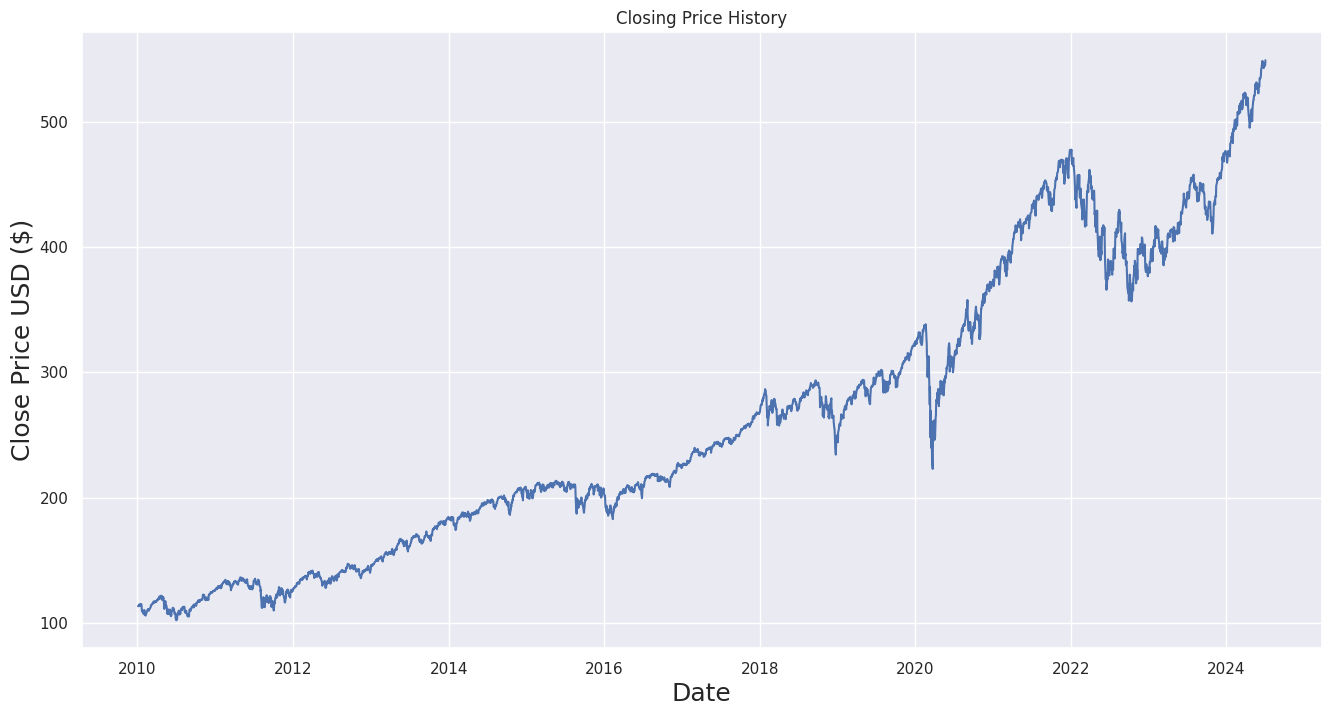

In [8]:
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(data_spy['Close'])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Price USD ($)",fontsize = 18)
plt.show()

In [9]:
data = data_spy.filter(['Close'])
#Convert the data frame to numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*0.8) # Training about 80% of the data
training_data_len

2919

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

In [ ]:
#Create the training data set, create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0]) # will contain 60 values
    y_train.append(train_data[i,0]) # will contain 61st value
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

In [12]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [13]:
#Reshape the data, LSTM expects the data to be 3dimensional: number of samples, number of time steps, number of features
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2859, 60, 1)

In [14]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#Compile the Model
model.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2859/2859 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 0.0015


In [17]:
#Create the testing data set
#Create a new array containing new scaled values from index end of training set to full testing data set
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test, y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [18]:
#Convert the data into scaled values, numpy arrays
x_test = np.array(x_test)

In [19]:
#Reshape it to 3d
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [21]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions-y_test)**2))
rmse

10.981726820703555

/tmp/ipykernel_44584/3906371567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


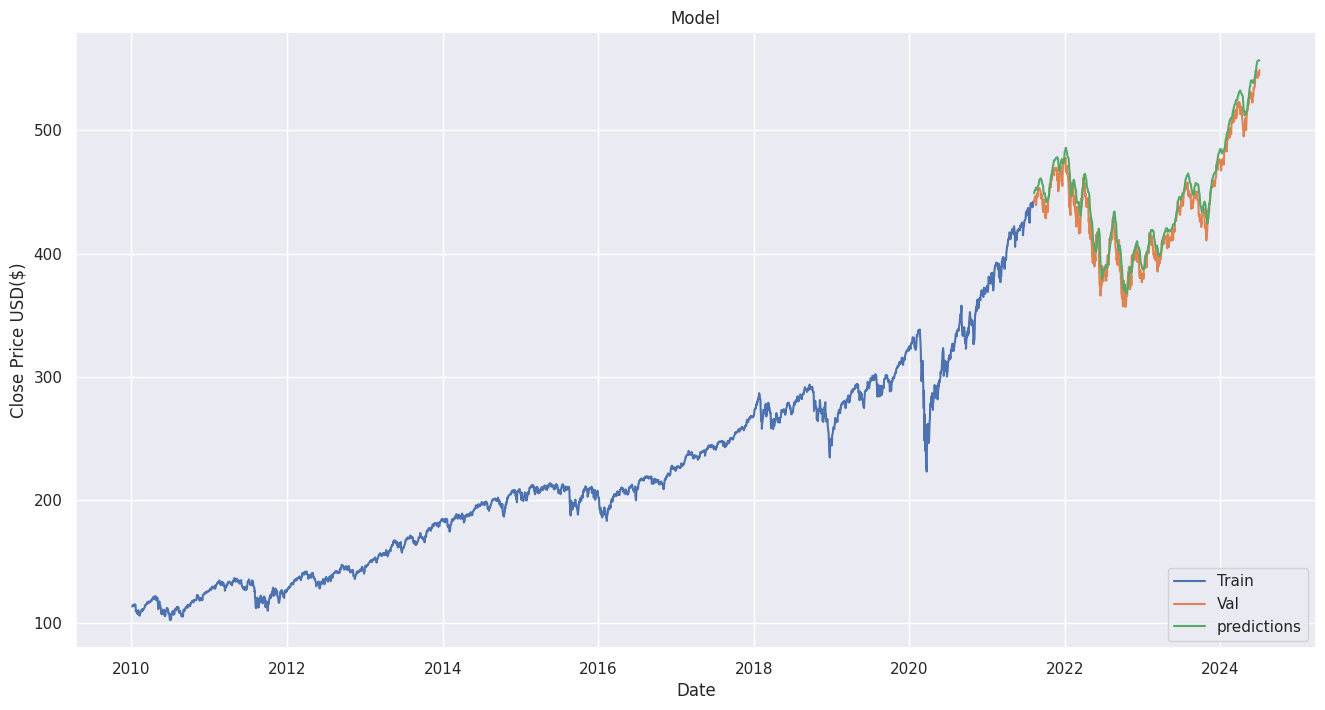

In [22]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc = 'lower right')
plt.show()

In [ ]:
valid['Open'] = data_spy['Open']
valid['Position'] = 0
valid['PnL'] = 0
new_order = ['Open','Close','predictions','Position','PnL']
valid = valid[new_order]
valid

In [27]:
count = 0
for i in range(1,len(valid)):
    if valid["predictions"].iloc[i]-valid['predictions'].iloc[i-1]>0.2:
        if valid["predictions"].iloc[i]-valid['predictions'].iloc[i-1]>1:
            entry_price = valid['Open'].iloc[i]
            exit_price = valid['Close'].iloc[i]
            valid['Position'].iloc[i] = 2
            valid['PnL'].iloc[i] = 2*(exit_price-entry_price)
            count+=1
        else:
            entry_price = valid['Open'].iloc[i]
            exit_price = valid['Close'].iloc[i]
            valid['Position'].iloc[i] = 1
            valid['PnL'].iloc[i] = exit_price-entry_price
            count+=1
    elif valid["predictions"].iloc[i]-valid['predictions'].iloc[i-1]<-0.2:
        if valid["predictions"].iloc[i]-valid['predictions'].iloc[i-1]<-1:
            entry_price = valid['Open'].iloc[i]
            exit_price = valid['Close'].iloc[i]
            valid['Position'].iloc[i] = -2
            valid['PnL'].iloc[i] = 2*(-exit_price+entry_price)
            count+=1
        else:
            entry_price = valid['Open'].iloc[i]
            exit_price = valid['Close'].iloc[i]
            valid['Position'].iloc[i] = -1
            valid['PnL'].iloc[i] = -exit_price+entry_price
            count+=1
    else:
        valid['Position'].iloc[i] = 0
        valid['PnL'].iloc[i] = 0
        continue
valid['Cumulative_PnL'] = valid['PnL'].cumsum()
valid


/tmp/ipykernel_44584/475417675.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  valid['Position'].iloc[i] = 1
/tmp/ipykernel_44584/475417675.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Open       Close  predictions  Position        PnL  \
Date                                                                   
2021-08-09  442.459991  442.130005   449.018219         0   0.000000   
2021-08-10  442.609985  442.679993   449.545105         1   0.070007   
2021-08-11  443.820007  443.779999   450.062469         1  -0.040009   
2021-08-12  443.619995  445.109985   450.653229         1   1.489990   
2021-08-13  445.589996  445.920013   451.378662         1   0.330017   
2021-08-16  444.529999  446.970001   452.185394         1   2.440002   
2021-08-17  444.239990  444.040009   453.070557         1  -0.199982   
2021-08-18  442.959991  439.179993   453.500763         1  -3.779999   
2021-08-19  436.269989  439.859985   453.024048        -1  -3.589996   
2021-08-20  440.230011  443.359985   452.249054        -1  -3.129974   
2021-08-23  445.160004  447.260010   451.863007        -1  -2.100006   
2021-08-24  447.970001  447.970001   452.214050         1   0.000000   
2021-08-25  448.170013  448.910004   452.977539         1   0.739990   
2021-08-26  448.609985  446.260010   453.984344         2  -4.699951   
2021-08-27  447.119995  450.250000   454.645569         1   3.130005   
2021-08-30  450.970001  452.230011   455.585785         1   1.260010   
2021-08-31  452.130005  451.559998   456.793488         2  -1.140015   
2021-09-01  452.559998  451.799988   457.896637         2  -1.520020   
2021-09-02  453.320007  453.190002   458.848785         1  -0.130005   
2021-09-03  451.980011  453.079987   459.788361         1   1.099976   
2021-09-07  452.709991  451.459991   460.585297         1  -1.250000   
2021-09-08  450.890015  450.910004   461.000488         1   0.019989   
2021-09-09  450.700012  448.980011   461.104187         0   0.000000   
2021-09-10  451.040009  445.440002   460.782959        -1   5.600006   
2021-09-13  448.640015  446.579987   459.826324        -1   2.060028   
2021-09-14  448.119995  444.170013   458.823303        -2   7.899963   
2021-09-15  444.619995  447.880005   457.592438        -2  -6.520020   
2021-09-16  447.320007  447.170013   456.889557        -1   0.149994   
2021-09-17  444.920013  441.399994   456.429993        -1   3.520020   
2021-09-20  434.880005  434.040009   455.402924        -2   1.679993   
...                ...         ...          ...       ...        ...   
2024-05-20  529.570007  530.059998   536.339417         2   0.979980   
2024-05-21  529.280029  531.359985   537.941345         2   4.159912   
2024-05-22  530.650024  529.830017   539.370728         2  -1.640015   
2024-05-23  532.960022  525.960022   540.323608         1  -7.000000   
2024-05-24  527.849976  529.440002   540.414429         0   0.000000   
2024-05-28  530.270020  529.809998   540.533142         0   0.000000   
2024-05-29  525.679993  526.099976   540.670837         0   0.000000   
2024-05-30  524.520020  522.609985   540.309387        -1   1.910034   
2024-05-31  523.590027  527.369995   539.301453        -2  -7.559937   
2024-06-03  529.020020  527.799988   538.731873        -1   1.220032   
2024-06-04  526.460022  528.390015   538.476440        -1  -1.929993   
2024-06-05  530.770020  534.669983   538.489380         0   0.000000   
2024-06-06  534.979980  534.659973   539.461853         1  -0.320007   
2024-06-07  533.659973  534.010010   540.765015         2   0.700073   
2024-06-10  533.179993  535.659973   541.997986         2   4.959961   
2024-06-11  534.070007  536.950012   543.267761         2   5.760010   
2024-06-12  541.630005  541.359985   544.559570         2  -0.540039   
2024-06-13  543.150024  542.450012   546.276306         2  -1.400024   
2024-06-14  540.880005  542.780029   548.113831         2   3.800049   
2024-06-17  542.080017  547.099976   549.825867         2  10.039917   
2024-06-18  547.159973  548.489990   551.830444         2   2.660034   
2024-06-20  549.440002  547.000000   553.890686         2  -4.880005   
2024-06-21  544.400024  544.510010   555.521484         2 